# Experiment Info

Split the sample data between clean segments and noised segments

In [12]:
# Import Numpy
import numpy as np
# For timer
import time
# Import torch
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split
# Import plotter
import matplotlib.pyplot as plt
# import other modules
import sys
sys.path.insert(0, '../ecg_toolkit/')
sys.path.insert(0, '../models/')
# ==== LOCAL LIBS ====
import ecg_tools_lite as etl
import models
# import ecg_tools as et

In [13]:
# Set date/time for logging:
from datetime import datetime
today = datetime.today().strftime("%B %d, %Y || %H:%M:%S")

print( today )

November 14, 2022 || 21:56:31


In [22]:
# Set variables here 
folder_path='../data/noised_samps/'
_SIG_BW = '118_gen_bw'
_SIG_EMA = '118_gen_em'
_SIG_MN = '118_gen_ma'
_SIG_CL = '118'

print( today )

November 14, 2022 || 21:56:31


# Notes
- 2 things needed
1. clean and noisy ECG data
2. Denoiser


In [25]:
# Load model here:
print(" -- LOADING MODEL --")
load_model_name = "E:\Developer\ecg_thesis_code\models\model_CNN_all_em.pt"
# Set model to use cnn_denoiser as foundation and set to run using cuda
model = models.cnn_denoiser().cuda()
# convert to double
model.double()
# Load existing model state (the one after training) 
model.load_state_dict( torch.load(load_model_name))
# Push to cuda
model.to('cuda')


 -- LOADING MODEL --


RuntimeError: Error(s) in loading state_dict for cnn_denoiser:
	Missing key(s) in state_dict: "denoiser.19.weight", "denoiser.19.bias", "denoiser.19.running_mean", "denoiser.19.running_var", "denoiser.21.weight", "denoiser.21.bias". 
	size mismatch for denoiser.18.weight: copying a param with shape torch.Size([1024, 1024]) from checkpoint, the shape in current model is torch.Size([1, 36, 19]).
	size mismatch for denoiser.18.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([1]).

In [3]:
# # Denoised output from DAE
# ecg_res = np.load( ecg_saved_res )
# ecg_noisy = torch.from_numpy(np.load('all_none_fs1024_e06.npy')).double()
# ecg_clean = torch.from_numpy(np.load('all_none_fs1024_e24.npy')).double()
# # Acquire original shape
# x = ecg_noisy.shape[0]
# y = ecg_noisy.shape[2]
# z = ecg_noisy.shape[1]
# # Load reference signals
# ecg_noisy = torch.reshape( ecg_noisy, (x, y, z))
# ecg_clean = torch.reshape( ecg_clean, (x, y, z))
# # normalize both
# ecg_noisy = et.norm_sig( ecg_noisy )
# ecg_clean = et.norm_sig( ecg_clean )
# # Flatten all three ecg signals
# ecg_noisy = ecg_noisy.flatten()
# ecg_clean = ecg_clean.flatten()
# ecg_res = ecg_res.flatten()

In [5]:
sig_bw_noised, sig_bw_clean = etl.get_ecg_with_split(_SIG_BW, folder_path=folder_path)
sig_ema_noised, sig_ema_clean = etl.get_ecg_with_split(_SIG_EMA, folder_path=folder_path)
sig_mn_noised, sig_mn_clean = etl.get_ecg_with_split(_SIG_MN, folder_path=folder_path)
sig_cl_noised, sig_cl_clean = etl.get_ecg_with_split(_SIG_CL, folder_path=folder_path) # note that both are clean

In [6]:
sig_bw_noised = sig_bw_noised.flatten()
sig_ema_noised = sig_ema_noised.flatten()
sig_mn_noised = sig_mn_noised.flatten()
sig_cl_noised = sig_cl_noised.flatten()

<Figure size 2000x800 with 0 Axes>

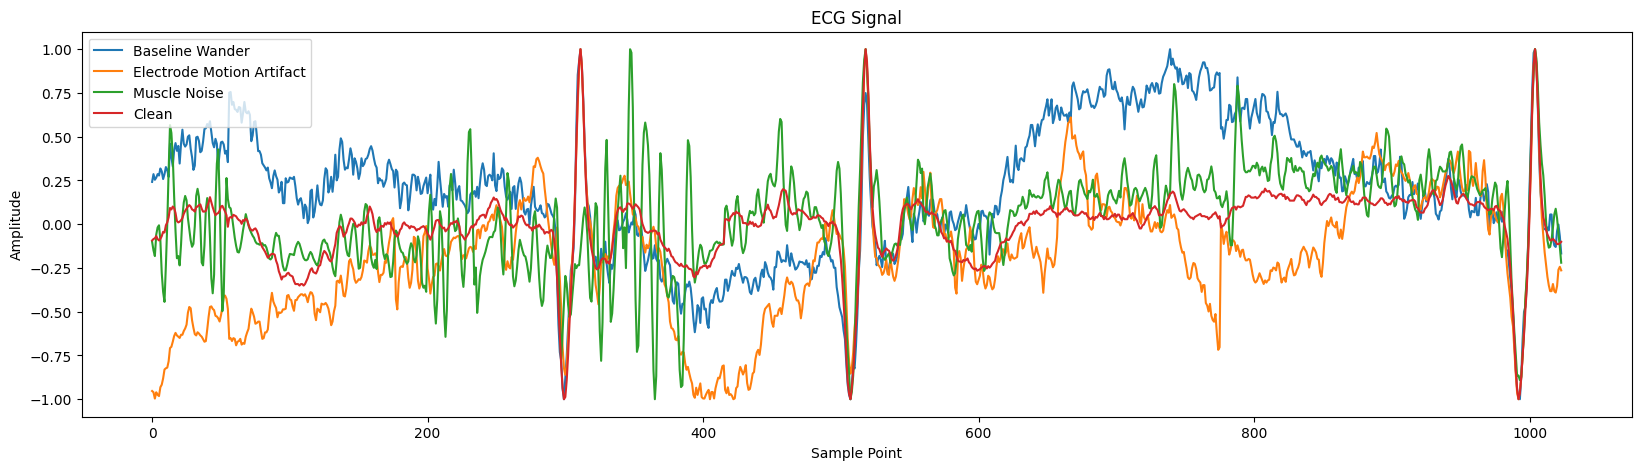

In [7]:
# Plot all 3 noise types together with the clean signal
etl.ecg_plot([sig_bw_noised, sig_ema_noised, sig_mn_noised, sig_cl_noised], ['Baseline Wander', 'Electrode Motion Artifact', 'Muscle Noise', 'Clean'], title='ECG Signal', index=1)

<Figure size 1440x576 with 0 Axes>

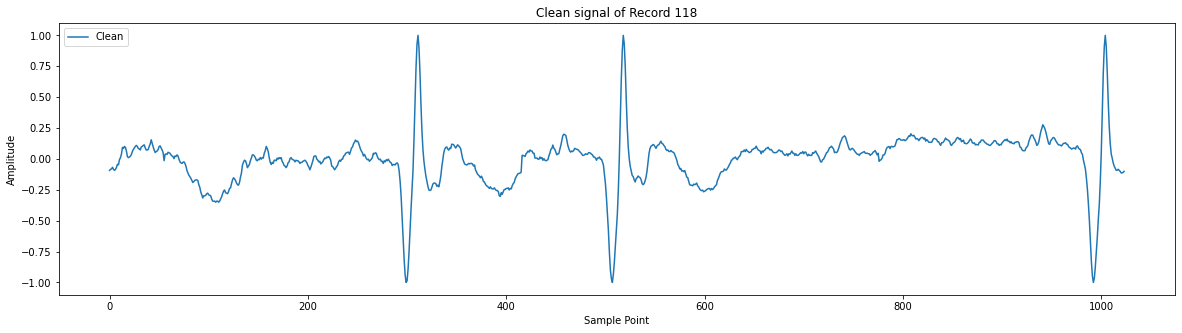

In [7]:
# Plot only clean signal
etl.ecg_plot([sig_cl_noised], ['Clean'], title='Clean signal of Record 118', index=1)

<Figure size 1440x576 with 0 Axes>

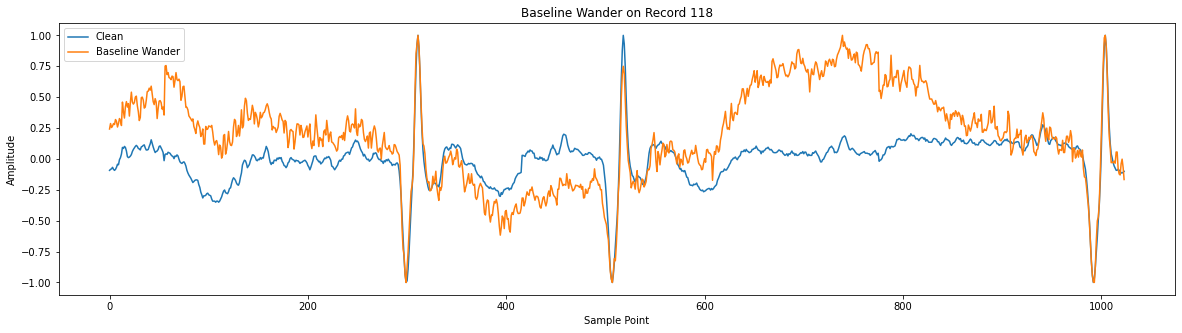

In [8]:
# Baseline Wander plot
etl.ecg_plot([sig_cl_noised, sig_bw_noised], ['Clean', 'Baseline Wander'], title='Baseline Wander on Record 118', index=1)

<Figure size 1440x576 with 0 Axes>

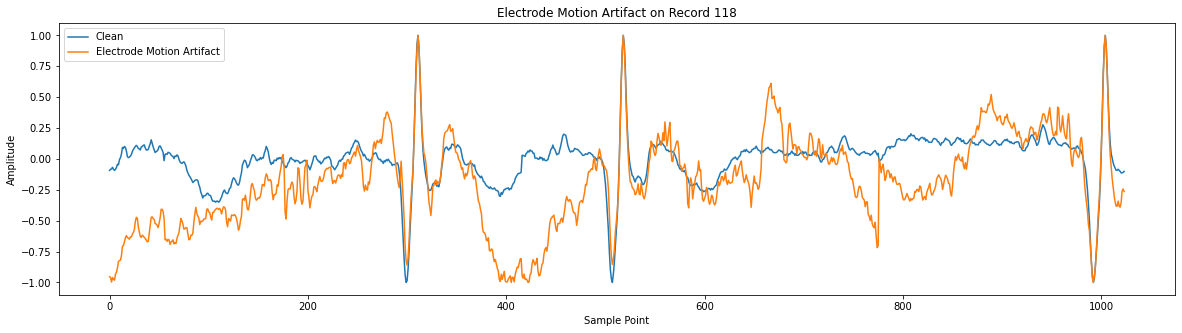

In [5]:
# Electrode Motion Artifact
etl.ecg_plot([sig_cl_noised, sig_ema_noised], ['Clean', 'Electrode Motion Artifact'], title='Electrode Motion Artifact on Record 118', index=1)

<Figure size 1440x576 with 0 Axes>

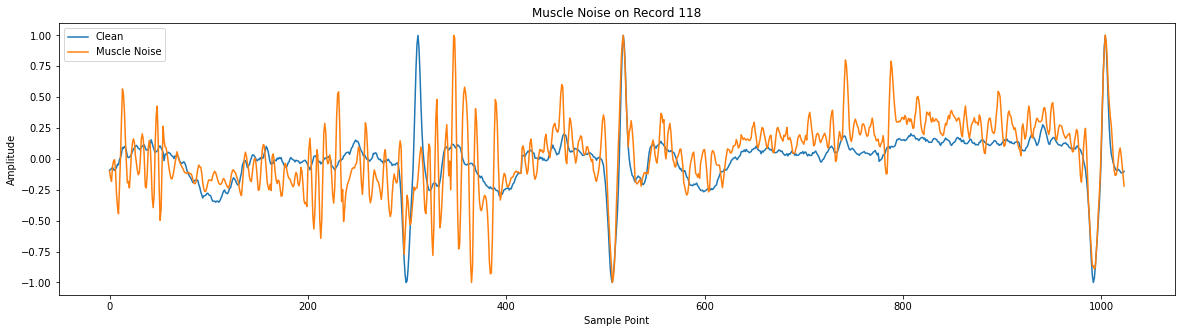

In [10]:
# Muscle Noise
etl.ecg_plot([sig_cl_noised, sig_mn_noised], ['Clean', 'Muscle Noise'], title='Muscle Noise on Record 118', index=1)